In [30]:
import cv2
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from torchvision import transforms
import random

video_legal_dir = r"C:\Users\VIP444\Desktop\새 폴더\agree"
video_illegal_dir = r"C:\Users\VIP444\Desktop\새 폴더\non-agree"

def transform_diagonal(image, mean = 0, std = 0, is_normalize = False):
    if is_normalize:
        transform = transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize(mean, std)
        ])

        return transform(image)
    else:
        transform = transforms.Compose([
            transforms.ToTensor(), 
        ])

        return transform(image)

def extract_diagnoal_matrix(dir_path : str):
    video_paths = glob.glob(dir_path + "\*.mp4")
    random.shuffle(video_paths)
    video_paths = video_paths[:5]
    video_diagonals = []
    video_names = []

    pre_ht = []

    for video_path in tqdm(video_paths, total=len(video_paths), desc="Extract Features"):
        vidcap = cv2.VideoCapture(video_path)
        vid_total_frames_num = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
        vid_frame_per_s = int(vidcap.get(cv2.CAP_PROP_FPS))
        video_name = video_path.split("\\")[-1]

        sections, retstep = np.linspace(1, vid_total_frames_num, 256, retstep=True)
        sections = list(map(math.floor, sections))
        frame_diagonals = []
        frames = []

        while(vidcap.isOpened()):
            ret, frame = vidcap.read()
            
            if not ret:
                break

            # if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) in sections or int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) not in sections:
            if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) in sections:
                frame = cv2.resize(frame, (256, 256))

                # frame = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)
                frame_r_ht = cv2.calcHist(frame, [0], None, [256], [0, 255])
                frame_g_ht = cv2.calcHist(frame, [1], None, [256], [0, 255])
                frame_b_ht = cv2.calcHist(frame, [2], None, [256], [0, 255])
                
                # if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) == 1:
                #     pre_frame_r_ht = frame_r_ht
                #     pre_frame_g_ht = frame_g_ht
                #     pre_frame_b_ht = frame_b_ht
                #     continue
                
                # frame_r_ht_df = abs(pre_frame_r_ht - frame_r_ht)
                # frame_g_ht_df = abs(pre_frame_g_ht - frame_g_ht)
                # frame_b_ht_df = abs(pre_frame_b_ht - frame_b_ht)

                # frame_r_ht = np.log10(abs(frame_r_ht))
                # frame_g_ht = np.log10(abs(frame_g_ht))
                # frame_b_ht = np.log10(abs(frame_b_ht))
                frame_diagonal = np.stack([frame_r_ht, frame_g_ht, frame_b_ht], -1)
                # frame_diagonal = np.stack([frame_r_ht_df, frame_g_ht_df, frame_b_ht_df], -1)
                frame_diagonals.append(frame_diagonal)

                # pre_frame_r_ht = frame_r_ht
                # pre_frame_g_ht = frame_g_ht
                # pre_frame_b_ht = frame_b_ht

        vidcap.release()
        video_diagonal = np.concatenate(frame_diagonals, axis=1)
        video_diagonal = np.log10(video_diagonal + 1)
        # video_diagonal = cv2.normalize(cv2.log(video_diagonal + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        # video_diagonal = np.log(np.exp(video_diagonal))
        # video_diagonal = transform_diagonal(video_diagonal.copy()).permute(1,2,0)
        video_diagonals.append(video_diagonal)
        video_names.append(video_name)
    
    return video_names, video_diagonals

legal_diagonals = extract_diagnoal_matrix(video_legal_dir)
illegal_diagonals = extract_diagnoal_matrix(video_illegal_dir)

Extract Features: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


In [31]:
diagonals_legal = []
diagonals_illegal = []
legal_names = []
illegal_names = []

for name, diagonal_legal in zip(legal_diagonals[0], legal_diagonals[1]):
    legal_names.append(name)
    diagonals_legal.append(diagonal_legal)

for name, diagonal_illegal in zip(illegal_diagonals[0], illegal_diagonals[1]):
    illegal_names.append(name)
    diagonals_illegal.append(diagonal_illegal)

364-001.mp4
(256, 256, 3)


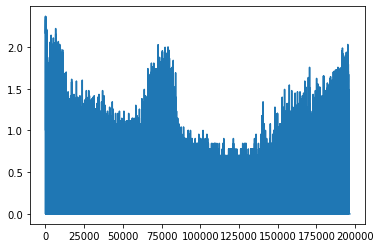

240-004.mp4
(256, 256, 3)


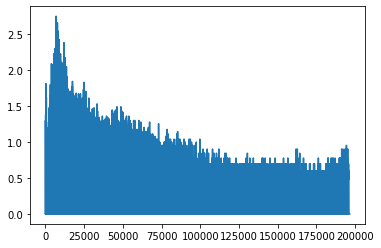

379-001.mp4
(256, 256, 3)


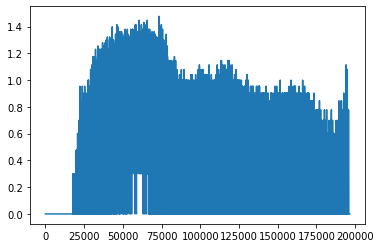

444-001.mp4
(256, 256, 3)


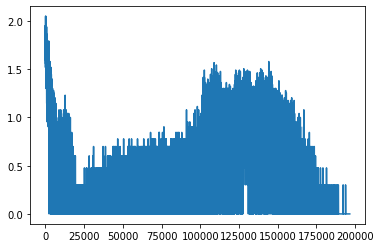

In [32]:
for n, i in zip(illegal_names, diagonals_illegal):
    print(n)
    print(i.shape)
    # print(i[0,:,0])
    # i = i.astype(np.uint8)
    # plt.imshow(i)
    plt.plot(i.ravel())
    plt.show()

In [ ]:
import glob

paths = glob.glob(r"D:\Video-Dataset\Kinetics400\test\*")

paths = [path.split("\\")[-1] for path in paths]
